In [1]:
%load_ext autoreload

In [29]:
%autoreload 2
import torch
import pandas as pd
from wrapers import *

In [3]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [4]:
def tSNE_transformation(embedded_data, ids, 
                        max_iter=300, 
                        verbose=1,):
    tsne = TSNE(n_components=2, verbose=verbose, perplexity=40, max_iter=max_iter)
    tsne_results = tsne.fit_transform(embedded_data)
    return tsne_results
def plot_tSNE(tsne_results, figsize=(10,10), hue_callback=None, legend_name = "",
              fig=None, ax=None,
              title=""):
    
    df = pd.DataFrame({})
    df['X'] = tsne_results[:,0]
    df['Y'] = tsne_results[:,1]
    df['id'] = ids
    #
    if hue_callback is not None:
        assert legend_name != "", "'legend_name' cannot be empty"        
        df[legend_name] = hue_callback(df, tsne_results, ids)
    #
    #
    np.random.seed(42)    
    rndperm = np.random.permutation(df.shape[0])
    #
    if ax is None and fig is None:
        fig = plt.figure(figsize=figsize)

    if ax is None:
        ax = fig.subplots()    
    sns.scatterplot(
        x="X", y="Y",
        hue= None if hue_callback is None else legend_name,
        palette=sns.color_palette("Set1", 10 if hue_callback is None else df[legend_name].unique().shape[0]),
        data=df.loc[rndperm,:],
        legend="full",
        alpha=0.3,
        ax=ax
    )
    ax.set_title(title)
    return ax, df
    

In [5]:
data_source = pd.read_csv('../data/TASK1 Material_Drug_SMILES.csv')

In [30]:
iso_smiles, smiles_id_dict, smiles_graphs = smiles_to_graphs(data_source["drugbank_id"].values,
                                                             data_source["SMILES"].values, isomericSmiles=True)

[15:54:54] Explicit valence for atom # 13 Cl, 5, is greater than permitted
[15:54:54] Explicit valence for atom # 13 Cl, 5, is greater than permitted
[15:54:54] SMILES Parse Error: syntax error while parsing: OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]
[15:54:54] SMILES Parse Error: Failed parsing SMILES 'OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]' for input: 'OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]'
[15:54:54] SMILES Parse Error: syntax error while parsing: OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[

The smiles id 1691:DB01929 has been failed.
The smiles id 1760:DB01999 has been failed.
The smiles id 2382:DB02667 has been failed.


[15:54:54] Explicit valence for atom # 19 O, 2, is greater than permitted
[15:54:54] Explicit valence for atom # 19 O, 2, is greater than permitted
[15:54:55] Explicit valence for atom # 0 O, 3, is greater than permitted
[15:54:55] Explicit valence for atom # 0 O, 3, is greater than permitted
[15:54:55] Unusual charge on atom 0 number of radical electrons set to zero
[15:54:55] Explicit valence for atom # 1 Al, 4, is greater than permitted
[15:54:55] Explicit valence for atom # 1 Al, 4, is greater than permitted


The smiles id 3717:DB04100 has been failed.
The smiles id 4034:DB04444 has been failed.


[15:54:56] Explicit valence for atom # 13 Be, 4, is greater than permitted
[15:54:56] Explicit valence for atom # 13 Be, 4, is greater than permitted


The smiles id 6588:DB08276 has been failed.


[15:54:56] Explicit valence for atom # 84 N, 4, is greater than permitted
[15:54:56] Explicit valence for atom # 84 N, 4, is greater than permitted
[15:54:56] SMILES Parse Error: syntax error while parsing: OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1
[15:54:56] SMILES Parse Error: Failed parsing SMILES 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1' for input: 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1'
[15:54:56] SMILES Parse Error: syntax error while parsing: OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1
[15:54:56] SMILES Parse Error: Failed parsing SMILES 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C

The smiles id 7539:DB09385 has been failed.
The smiles id 7944:DB11630 has been failed.


[15:54:56] Explicit valence for atom # 1 Cl, 4, is greater than permitted
[15:54:56] Explicit valence for atom # 1 Cl, 4, is greater than permitted


The smiles id 8630:DB12453 has been failed.


[15:54:57] WARNING: not removing hydrogen atom without neighbors
[15:54:57] WARNING: not removing hydrogen atom without neighbors
[15:54:57] Explicit valence for atom # 1 B, 6, is greater than permitted
[15:54:57] Explicit valence for atom # 1 B, 6, is greater than permitted


The smiles id 11585:DB17408 has been failed.


[15:55:05] Unusual charge on atom 42 number of radical electrons set to zero
[15:55:20] WARNING: not removing hydrogen atom without neighbors
[15:55:20] WARNING: not removing hydrogen atom without neighbors


In [31]:
len(iso_smiles), data_source.shape[0], data_source.shape[0] - len(iso_smiles)

(11914, 11924, 10)

#### Two different datasets
1. Entire data as one batch: This will correct the population statistics in Batch Normalisation layers (full_dataset).
2. Single element itertable dataset: For actual prediction (stream_dataset).

In [7]:
from torch.utils.data.dataloader import DataLoader

full_dataset = CompoundsStreamFull(iso_smiles, smiles_graphs, smiles_id_dict)

stream_dataset = CompoundsStream(iso_smiles, smiles_graphs, smiles_id_dict)
stream_loader = DataLoader(dataset=stream_dataset, batch_size = 1)

> We compare two different model executions:
  1. By updating Batch Normalisation layers, using the new dataset (model).
  2. Using fixed mean and std of the trained Batch Normalisation from original study (model_fixed).

In [8]:
model = GINConvNet_augmented()
model.load_state_dict(torch.load("../GraphDTA/model_GINConvNet_davis.model", weights_only=True))
model_fixed = GINConvNet_augmented()
model_fixed.load_state_dict(torch.load("../GraphDTA/model_GINConvNet_davis.model", weights_only=True))

<All keys matched successfully>

In [9]:
# By updating batch normalisation
model.train()
with torch.no_grad():
    _ = model.forward_dummy(full_dataset.get_data())

model.eval()       
embedded_mols = []
with torch.no_grad():
    for data in stream_loader:        
        m = model.g_embedding(data)
        embedded_mols.append(m)
# By using original statistics
model_fixed.eval()       
embedded_mols_fixed = []
with torch.no_grad():
    for data in stream_loader:       
        m = model_fixed.g_embedding(data)
        embedded_mols_fixed.append(m)

/home/roozbeh/Desktop/comp-bio/task1/notebooks/wrapers.py:407: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  yield torch.Tensor(features), torch.LongTensor(np.array(edge_index)).transpose(1, 0), id


In [10]:
arr_embedded_mols = np.array([ item[0].numpy().reshape(-1) for item in embedded_mols])
arr_embedded_mols_fixed = np.array([ item[0].numpy().reshape(-1) for item in embedded_mols_fixed])
ids = [ str(item[1][0]) for item in embedded_mols ]
embedded_mols_tsne = tSNE_transformation(arr_embedded_mols, ids, max_iter=2000, verbose=0)
embedded_mols_fixed_tsne = tSNE_transformation(arr_embedded_mols_fixed, ids, max_iter=2000, verbose=0)

/tmp/ipykernel_3570538/888292711.py:29: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


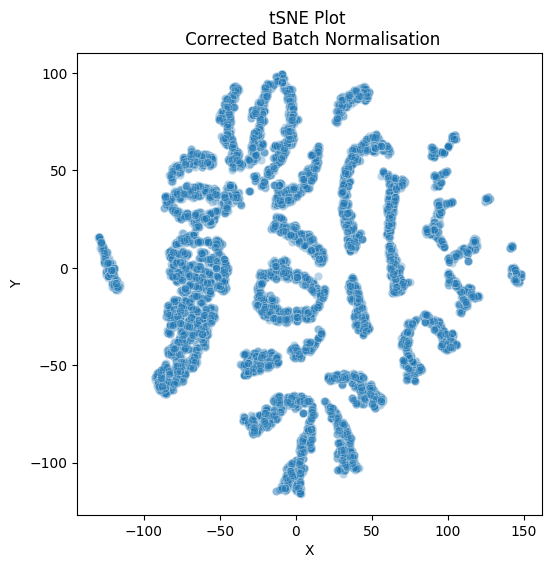

In [11]:
_, df_tSNE = plot_tSNE(embedded_mols_tsne, figsize=(6,6), title="tSNE Plot \n Corrected Batch Normalisation")

/tmp/ipykernel_3570538/888292711.py:29: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


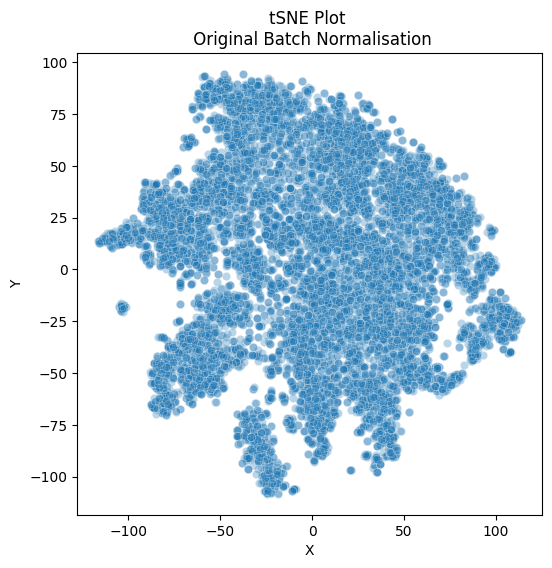

In [12]:
_ = plot_tSNE(embedded_mols_fixed_tsne, figsize=(6,6), title="tSNE Plot \n Original Batch Normalisation")

# Save to disk

In [13]:
len(embedded_mols), data_source.shape, data_source.shape[0] - len(embedded_mols), data_source.shape[0]-len(iso_smiles)

(11914, (11924, 4), 10, 10)

In [14]:
def save_csv(embedded_mols, method_name, extra=""):
    df = pd.DataFrame({
        'embedding':[str(item.view(-1).numpy().tolist()) for item,_ in embedded_mols],
        'label':[str(item[0]) for _, item in embedded_mols]
    })
    df.to_csv(f"../data/drug_{method_name}{extra}_label.csv", index=False)
    
    

In [15]:
save_csv(embedded_mols, "GraphDTA_GINConvNet")

In [16]:
df2 = data_source.set_index("drugbank_id")
def Is_single_matom_mol(id):
    # Single atom Mol
    smiles = df2.loc[id]["SMILES"]
    mol = Chem.MolFromSmiles(smiles)    
    return len(mol.GetBonds()) == 0

def hue_callback(df, tsne_results, ids):
    targets = [""] * df.shape[0]
    for i in range(df.shape[0]):
        if Is_single_matom_mol(ids[i]):
            targets[i] = "single"
    
    return targets

In [17]:
import os
from rdkit import RDConfig
from rdkit.Chem.FeatMaps import FeatMaps
from rdkit.Chem import AllChem
fdef = AllChem.BuildFeatureFactory(os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef'))
print(fdef.GetFeatureFamilies())


# fmParams = {}
# for k in fdef.GetFeatureFamilies():
#     fparams = FeatMaps.FeatMapParams()
#     fmParams[k] = fparams


df2 = data_source.set_index("drugbank_id")
def find_features(mol):
    featLists = []
    rawFeats = fdef.GetFeaturesForMol(mol)
    # filter that list down to only include the ones we're intereted in 
    return [f for f in rawFeats if f.GetFamily() in keep]
    #return [f for f in rawFeats]

def create_hue_callback(family, post_apply=None):
    def hue_callback(df, tsne_results, ids):
        targets = [0] *  df_features.shape[0]#df_features[[family]]         
        if post_apply is not None:
            targets = [ post_apply(item) for item in df_features[family] ]
        else:
            targets = [ item for item in df_features[family] ]
        return targets
    return hue_callback

('Donor', 'Acceptor', 'NegIonizable', 'PosIonizable', 'ZnBinder', 'Aromatic', 'Hydrophobe', 'LumpedHydrophobe')


In [18]:
import collections
keep = ('Donor','Acceptor','NegIonizable','PosIonizable','Aromatic', 'ZnBinder', 'Hydrophobe', 'LumpedHydrophobe')

df_features = pd.DataFrame(np.zeros((embedded_mols_tsne.shape[0], 1+len(keep))), columns = ('id',)+ keep, dtype=np.int32)
df_features['id'] = df_features['id'].astype(str)
for i in range(embedded_mols_tsne.shape[0]):
    id = ids[i]
    df_features.loc[i, 'id'] = id
    smiles = df2.loc[id]["SMILES"]
    mol = Chem.MolFromSmiles(smiles)
    #try:
    features = find_features(mol)
    c = collections.Counter(sorted([feature.GetFamily() for feature in features])) 
    for family in keep:
        if family in c:
            df_features.loc[i, family] = c[family]
        else:
            df_features.loc[i, family] = 0

[12:03:34] Unusual charge on atom 0 number of radical electrons set to zero
[12:05:07] WARNING: not removing hydrogen atom without neighbors
[12:05:07] WARNING: not removing hydrogen atom without neighbors


In [19]:
df_features.head()

,id,Donor,Acceptor,NegIonizable,PosIonizable,Aromatic,ZnBinder,Hydrophobe,LumpedHydrophobe
0,DB00006,31,33,6,2,3,6,22,4
1,DB00007,18,13,0,2,4,0,12,4
2,DB00014,19,15,0,2,4,0,10,4
3,DB00027,20,16,0,0,8,0,24,12
4,DB00035,15,12,0,1,2,0,9,2


In [20]:
def get_plot_info_by_smiles(smiles, df_tSNE):
    id, drug_name, drug_type, _ = data_source.loc[data_source["SMILES"] == smiles].to_numpy()[0]    
    x,y,*_ = df_tSNE.loc[df_tSNE['id'] == id].to_numpy()[0]
    return x,y,id,drug_name, drug_type

def get_plot_info_by_id(id, df_tSNE):
    _, drug_name, drug_type, _ = data_source.loc[data_source["drugbank_id"] == id].to_numpy()[0]    
    x,y,*_ = df_tSNE.loc[df_tSNE['id'] == id].to_numpy()[0]
    return x,y,id,drug_name, drug_type

def annotate_smiles(smiles, df_tSNE, x_shift=-10, y_shift=-10):
    x,y,id,drug_name, drug_type = get_plot_info_by_smiles(smiles, df_tSNE)
    plt.annotate(f'{drug_name}',xy=(x,y),xytext=(x+x_shift,y+y_shift),
                   arrowprops={"width":.4,"headwidth":2,'headlength':2},
                   horizontalalignment='center',fontsize=8)

def annotate_id(id, df_tSNE, x_shift=-10, y_shift=-10):
    x,y,id,drug_name, drug_type = get_plot_info_by_id(id, df_tSNE)
    plt.annotate(f'{drug_name}',xy=(x,y),xytext=(x+x_shift,y+y_shift),
                   arrowprops={"width":.4,"headwidth":2,'headlength':2},
                   horizontalalignment='center',fontsize=8) 

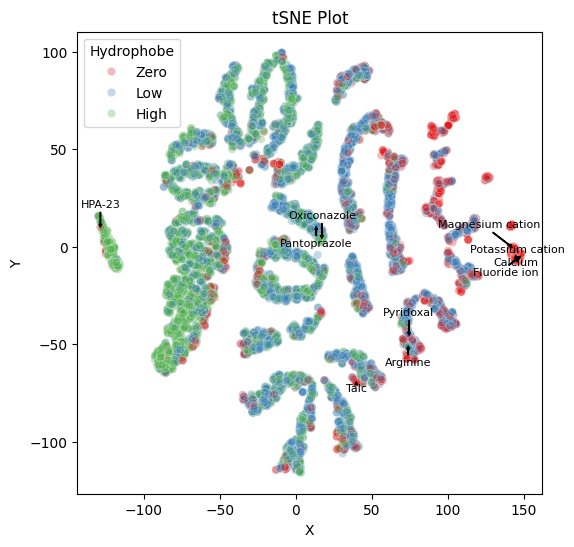

In [27]:
from rdkit import DataStructs
from rdkit.Chem import AllChem
fpgen = AllChem.GetRDKitFPGenerator()

def Hydrophobe_cat(val):    
    if val == 0:
        return "Zero"
    elif val > 0 and val <= 4:
        return "Low"
    else:
        return "High"

hue_callback = create_hue_callback("Hydrophobe", Hydrophobe_cat)
ax, df_tSNE = plot_tSNE(embedded_mols_tsne, figsize=(6,6), legend_name="Hydrophobe",
                       hue_callback=hue_callback,
                       title="tSNE Plot")

annotate_smiles("[F-]", df_tSNE, x_shift=-10, y_shift=-10)
annotate_smiles("[K+]", df_tSNE, x_shift=0, y_shift=5)
#annotate_smiles("[Li+]", df_tSNE, x_shift=-15, y_shift=-5)
#annotate_smiles("[Al]", df_tSNE, x_shift=-15, y_shift=0)
annotate_smiles("[Ca]", df_tSNE, x_shift=0, y_shift=-5)
annotate_smiles("[Mg++]", df_tSNE, x_shift=-15, y_shift=10)
	
annotate_id("DB09511", df_tSNE, x_shift=0, y_shift=-5)#Talc
annotate_id("DB17739", df_tSNE, x_shift=0, y_shift=10)#HPA-23

mol1, mol2 , *_ = df_tSNE[(df_tSNE['X'] > 0) & (df_tSNE['X'] < 20) & (df_tSNE['Y'] > 0) & (df_tSNE['Y'] < 20)].to_numpy()
mol3, mol4 , *_ = df_tSNE[(df_tSNE['X'] > 50) & (df_tSNE['X'] < 80) & (df_tSNE['Y'] > -70) & (df_tSNE['Y'] < -45)].to_numpy()
annotate_id(mol1[2], df_tSNE, x_shift=0, y_shift=-10)
annotate_id(mol2[2], df_tSNE, x_shift=0, y_shift=10)
annotate_id(mol3[2], df_tSNE, x_shift=0, y_shift=-10)
annotate_id(mol4[2], df_tSNE, x_shift=0, y_shift=10)


mols = [mol1, mol2,mol3,mol4]
xys_list = [(m[0], m[1]) for m in mols]
ids_list = [str(m[2]) for m in mols]
smiles_list = [data_source[data_source["drugbank_id"] == id]["SMILES"].to_numpy()[0] for id in ids_list]
rdkits_mol_list = [ Chem.MolFromSmiles(s) for s in  smiles_list]
finger_prints_list = [fpgen.GetFingerprint(m) for m in rdkits_mol_list]
mutual_distances = []
mutual_distances_by_name = []
mutual_distances_by_xy = []
for i in range(4):
    for j in range(i+1, 4):
        d = DataStructs.TanimotoSimilarity(finger_prints_list[i], finger_prints_list[j])
        mutual_distances.append((ids_list[i], ids_list[j], d))
        _, drug_name1, drug_type, _ = data_source.loc[data_source["drugbank_id"] == ids_list[i]].to_numpy()[0]
        _, drug_name2, drug_type, _ = data_source.loc[data_source["drugbank_id"] == ids_list[j]].to_numpy()[0]
        mutual_distances_by_name.append((drug_name1, drug_name2, d))
        mutual_distances_by_xy.append((xys_list[i], xys_list[j], d))


# for xy1, xy2, d in mutual_distances_by_xy:
#     x1, y1 = xy1
#     x2, y2 = xy2
#     plt.plot( [x1, x2], [y1, y2], '--')
#     plt.text((x1+x2)/2, (y1+y2)/2, f"{d:.1f}", fontsize=8)

In [22]:
mutual_distances_by_name

[('Pantoprazole', 'Oxiconazole', 0.24732949876746096),
 ('Pantoprazole', 'Arginine', 0.06243386243386243),
 ('Pantoprazole', 'Pyridoxal', 0.2520852641334569),
 ('Oxiconazole', 'Arginine', 0.05511811023622047),
 ('Oxiconazole', 'Pyridoxal', 0.1780962128966223),
 ('Arginine', 'Pyridoxal', 0.054635761589403975)]

In [23]:
#mol1, mol2 , *_ = df_tSNE[(df_tSNE['X'] > -100) & (df_tSNE['X'] < -90) & (df_tSNE['Y'] > -20) & (df_tSNE['Y'] < 0)].to_numpy()
#mol1, mol2 , *_ = df_tSNE[(df_tSNE['X'] > 50) & (df_tSNE['X'] < 80) & (df_tSNE['Y'] > -70) & (df_tSNE['Y'] < -45)].to_numpy()
#mol3, mol4 , *_ = df_tSNE[(df_tSNE['X'] > 25) & (df_tSNE['X'] < 50) & (df_tSNE['Y'] > 75) & (df_tSNE['Y'] < 100)].to_numpy()

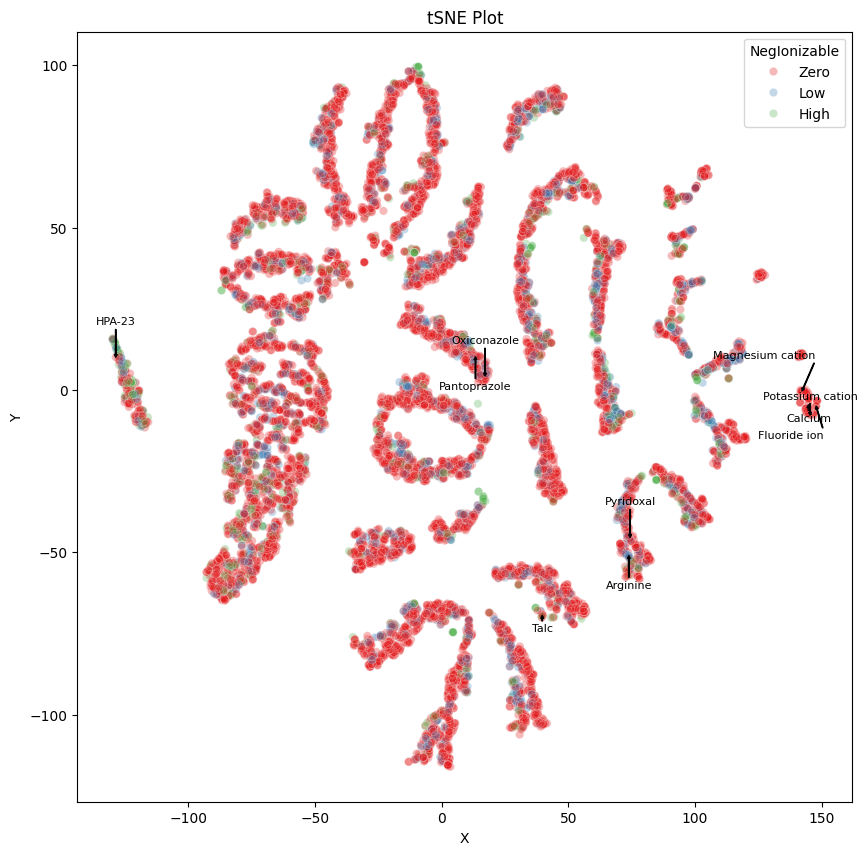

In [24]:
from rdkit import DataStructs
from rdkit.Chem import AllChem
fpgen = AllChem.GetRDKitFPGenerator()

def NegIonizable_cat(val):
    if val == 0:
        return "Zero"
    elif val > 0 and val <= 1:
        return "Low"
    else:
        return "High"

hue_callback = create_hue_callback("NegIonizable", NegIonizable_cat)
ax, df_tSNE = plot_tSNE(embedded_mols_tsne, figsize=(10,10), legend_name="NegIonizable",
                       hue_callback=hue_callback,
                       title="tSNE Plot")

annotate_smiles("[F-]", df_tSNE, x_shift=-10, y_shift=-10)
annotate_smiles("[K+]", df_tSNE, x_shift=0, y_shift=5)
#annotate_smiles("[Li+]", df_tSNE, x_shift=-15, y_shift=-5)
#annotate_smiles("[Al]", df_tSNE, x_shift=-15, y_shift=0)
annotate_smiles("[Ca]", df_tSNE, x_shift=0, y_shift=-5)
annotate_smiles("[Mg++]", df_tSNE, x_shift=-15, y_shift=10)
	
annotate_id("DB09511", df_tSNE, x_shift=0, y_shift=-5)#Talc
annotate_id("DB17739", df_tSNE, x_shift=0, y_shift=10)#HPA-23

mol1, mol2 , *_ = df_tSNE[(df_tSNE['X'] > 0) & (df_tSNE['X'] < 20) & (df_tSNE['Y'] > 0) & (df_tSNE['Y'] < 20)].to_numpy()
mol3, mol4 , *_ = df_tSNE[(df_tSNE['X'] > 50) & (df_tSNE['X'] < 80) & (df_tSNE['Y'] > -70) & (df_tSNE['Y'] < -45)].to_numpy()
annotate_id(mol1[2], df_tSNE, x_shift=0, y_shift=-10)
annotate_id(mol2[2], df_tSNE, x_shift=0, y_shift=10)
annotate_id(mol3[2], df_tSNE, x_shift=0, y_shift=-10)
annotate_id(mol4[2], df_tSNE, x_shift=0, y_shift=10)


mols = [mol1, mol2,mol3,mol4]
xys_list = [(m[0], m[1]) for m in mols]
ids_list = [str(m[2]) for m in mols]
smiles_list = [data_source[data_source["drugbank_id"] == id]["SMILES"].to_numpy()[0] for id in ids_list]
rdkits_mol_list = [ Chem.MolFromSmiles(s) for s in  smiles_list]
finger_prints_list = [fpgen.GetFingerprint(m) for m in rdkits_mol_list]
mutual_distances = []
mutual_distances_by_name = []
mutual_distances_by_xy = []
for i in range(4):
    for j in range(i+1, 4):
        d = DataStructs.TanimotoSimilarity(finger_prints_list[i], finger_prints_list[j])
        mutual_distances.append((ids_list[i], ids_list[j], d))
        _, drug_name1, drug_type, _ = data_source.loc[data_source["drugbank_id"] == ids_list[i]].to_numpy()[0]
        _, drug_name2, drug_type, _ = data_source.loc[data_source["drugbank_id"] == ids_list[j]].to_numpy()[0]
        mutual_distances_by_name.append((drug_name1, drug_name2, d))
        mutual_distances_by_xy.append((xys_list[i], xys_list[j], d))


# for xy1, xy2, d in mutual_distances_by_xy:
#     x1, y1 = xy1
#     x2, y2 = xy2
#     plt.plot( [x1, x2], [y1, y2], '--')
#     plt.text((x1+x2)/2, (y1+y2)/2, f"{d:.1f}", fontsize=8)

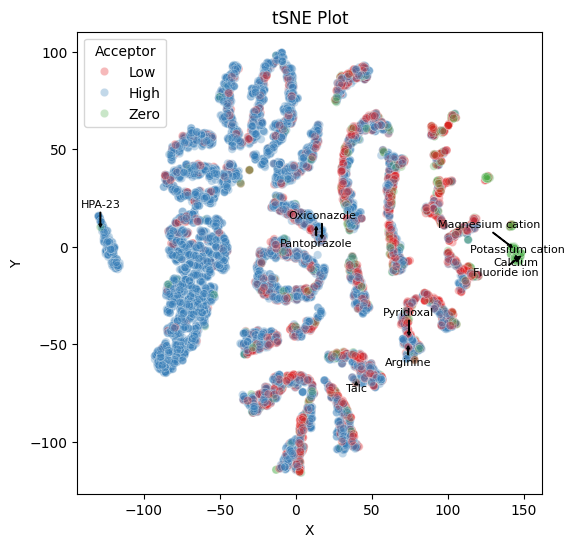

In [28]:
from rdkit import DataStructs
from rdkit.Chem import AllChem
fpgen = AllChem.GetRDKitFPGenerator()

def Acceptor_cat(val):
    if val == 0:
        return "Zero"
    elif val > 0 and val <= 2:
        return "Low"
    else:
        return "High"

hue_callback = create_hue_callback("Acceptor", Acceptor_cat)
ax, df_tSNE = plot_tSNE(embedded_mols_tsne, figsize=(6,6), legend_name="Acceptor",
                       hue_callback=hue_callback,
                       title="tSNE Plot")

annotate_smiles("[F-]", df_tSNE, x_shift=-10, y_shift=-10)
annotate_smiles("[K+]", df_tSNE, x_shift=0, y_shift=5)
#annotate_smiles("[Li+]", df_tSNE, x_shift=-15, y_shift=-5)
#annotate_smiles("[Al]", df_tSNE, x_shift=-15, y_shift=0)
annotate_smiles("[Ca]", df_tSNE, x_shift=0, y_shift=-5)
annotate_smiles("[Mg++]", df_tSNE, x_shift=-15, y_shift=10)
	
annotate_id("DB09511", df_tSNE, x_shift=0, y_shift=-5)#Talc
annotate_id("DB17739", df_tSNE, x_shift=0, y_shift=10)#HPA-23

mol1, mol2 , *_ = df_tSNE[(df_tSNE['X'] > 0) & (df_tSNE['X'] < 20) & (df_tSNE['Y'] > 0) & (df_tSNE['Y'] < 20)].to_numpy()
mol3, mol4 , *_ = df_tSNE[(df_tSNE['X'] > 50) & (df_tSNE['X'] < 80) & (df_tSNE['Y'] > -70) & (df_tSNE['Y'] < -45)].to_numpy()
annotate_id(mol1[2], df_tSNE, x_shift=0, y_shift=-10)
annotate_id(mol2[2], df_tSNE, x_shift=0, y_shift=10)
annotate_id(mol3[2], df_tSNE, x_shift=0, y_shift=-10)
annotate_id(mol4[2], df_tSNE, x_shift=0, y_shift=10)


mols = [mol1, mol2,mol3,mol4]
xys_list = [(m[0], m[1]) for m in mols]
ids_list = [str(m[2]) for m in mols]
smiles_list = [data_source[data_source["drugbank_id"] == id]["SMILES"].to_numpy()[0] for id in ids_list]
rdkits_mol_list = [ Chem.MolFromSmiles(s) for s in  smiles_list]
finger_prints_list = [fpgen.GetFingerprint(m) for m in rdkits_mol_list]
mutual_distances = []
mutual_distances_by_name = []
mutual_distances_by_xy = []
for i in range(4):
    for j in range(i+1, 4):
        d = DataStructs.TanimotoSimilarity(finger_prints_list[i], finger_prints_list[j])
        mutual_distances.append((ids_list[i], ids_list[j], d))
        _, drug_name1, drug_type, _ = data_source.loc[data_source["drugbank_id"] == ids_list[i]].to_numpy()[0]
        _, drug_name2, drug_type, _ = data_source.loc[data_source["drugbank_id"] == ids_list[j]].to_numpy()[0]
        mutual_distances_by_name.append((drug_name1, drug_name2, d))
        mutual_distances_by_xy.append((xys_list[i], xys_list[j], d))


# for xy1, xy2, d in mutual_distances_by_xy:
#     x1, y1 = xy1
#     x2, y2 = xy2
#     plt.plot( [x1, x2], [y1, y2], '--')
#     plt.text((x1+x2)/2, (y1+y2)/2, f"{d:.1f}", fontsize=8)

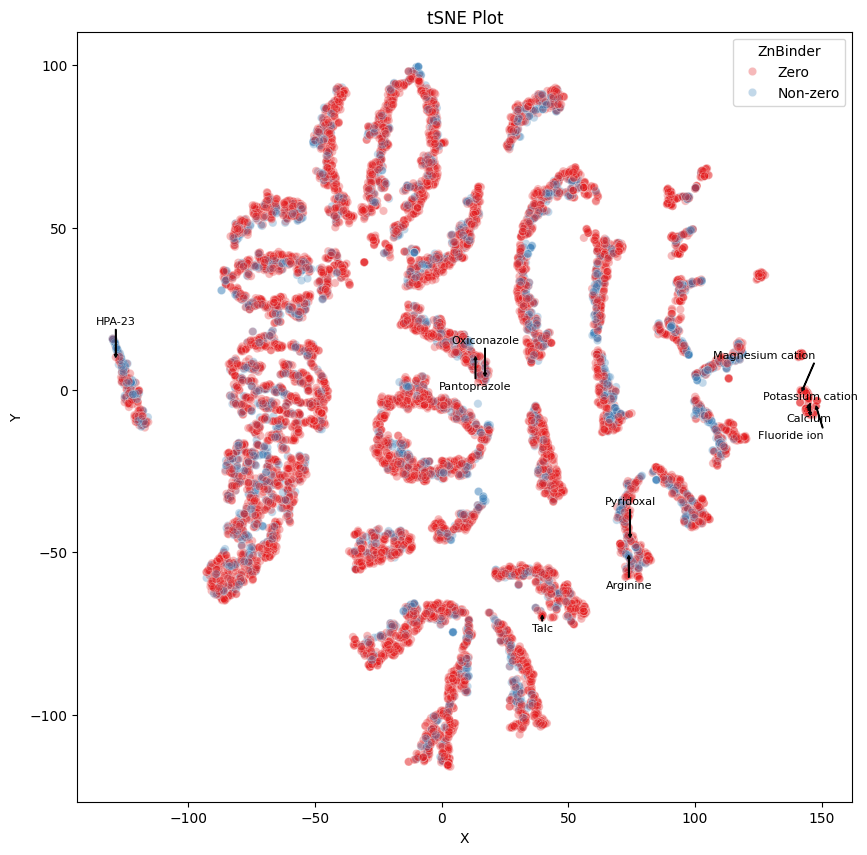

In [26]:
from rdkit import DataStructs
from rdkit.Chem import AllChem
fpgen = AllChem.GetRDKitFPGenerator()

def ZnBinder_cat(val):
    #if val == 0:
    #    return "Zero"
    #elif val > 0 and val <= 5:
    if val <= 0:
        return "Zero"
    else:
        return "Non-zero"

hue_callback = create_hue_callback("ZnBinder", ZnBinder_cat)
ax, df_tSNE = plot_tSNE(embedded_mols_tsne, figsize=(10,10), legend_name="ZnBinder",
                       hue_callback=hue_callback,
                       title="tSNE Plot")

annotate_smiles("[F-]", df_tSNE, x_shift=-10, y_shift=-10)
annotate_smiles("[K+]", df_tSNE, x_shift=0, y_shift=5)
#annotate_smiles("[Li+]", df_tSNE, x_shift=-15, y_shift=-5)
#annotate_smiles("[Al]", df_tSNE, x_shift=-15, y_shift=0)
annotate_smiles("[Ca]", df_tSNE, x_shift=0, y_shift=-5)
annotate_smiles("[Mg++]", df_tSNE, x_shift=-15, y_shift=10)
	
annotate_id("DB09511", df_tSNE, x_shift=0, y_shift=-5)#Talc
annotate_id("DB17739", df_tSNE, x_shift=0, y_shift=10)#HPA-23

mol1, mol2 , *_ = df_tSNE[(df_tSNE['X'] > 0) & (df_tSNE['X'] < 20) & (df_tSNE['Y'] > 0) & (df_tSNE['Y'] < 20)].to_numpy()
mol3, mol4 , *_ = df_tSNE[(df_tSNE['X'] > 50) & (df_tSNE['X'] < 80) & (df_tSNE['Y'] > -70) & (df_tSNE['Y'] < -45)].to_numpy()
annotate_id(mol1[2], df_tSNE, x_shift=0, y_shift=-10)
annotate_id(mol2[2], df_tSNE, x_shift=0, y_shift=10)
annotate_id(mol3[2], df_tSNE, x_shift=0, y_shift=-10)
annotate_id(mol4[2], df_tSNE, x_shift=0, y_shift=10)


mols = [mol1, mol2,mol3,mol4]
xys_list = [(m[0], m[1]) for m in mols]
ids_list = [str(m[2]) for m in mols]
smiles_list = [data_source[data_source["drugbank_id"] == id]["SMILES"].to_numpy()[0] for id in ids_list]
rdkits_mol_list = [ Chem.MolFromSmiles(s) for s in  smiles_list]
finger_prints_list = [fpgen.GetFingerprint(m) for m in rdkits_mol_list]
mutual_distances = []
mutual_distances_by_name = []
mutual_distances_by_xy = []
for i in range(4):
    for j in range(i+1, 4):
        d = DataStructs.TanimotoSimilarity(finger_prints_list[i], finger_prints_list[j])
        mutual_distances.append((ids_list[i], ids_list[j], d))
        _, drug_name1, drug_type, _ = data_source.loc[data_source["drugbank_id"] == ids_list[i]].to_numpy()[0]
        _, drug_name2, drug_type, _ = data_source.loc[data_source["drugbank_id"] == ids_list[j]].to_numpy()[0]
        mutual_distances_by_name.append((drug_name1, drug_name2, d))
        mutual_distances_by_xy.append((xys_list[i], xys_list[j], d))


# for xy1, xy2, d in mutual_distances_by_xy:
#     x1, y1 = xy1
#     x2, y2 = xy2
#     plt.plot( [x1, x2], [y1, y2], '--')
#     plt.text((x1+x2)/2, (y1+y2)/2, f"{d:.1f}", fontsize=8)